In [7]:
import datetime
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import tables
from tqdm import tqdm
#%matplotlib inline
import random
import math


In [1]:
# lets see all the comparisons you could make
1. between stimuli
2. between fish
3. thourgh the trial
4. through experimental time

# what you could compare
0. simple histogram of bouts and other things
1. response frequency as pure, no matter which direction, and then left right straight - number of responses/total trials in which the animal was tracked? or hmm... total trails with that stimulus???
2. preference absolute,left,right,straight, by defining straight beforehand
3. response strength - 1. angle of bout and 2. bout distance 3. bout speed
4. response strength per frequency or other weird comboc
5. if x came after y, if y came after x...

Plot individual fish and the whole trial with y axis angle and x axis time...



SyntaxError: invalid syntax (266036537.py, line 2)

In [107]:
df = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\data_processed\plaid_spectrum_angles\data_preprocessed.hdf5")
df_combined_data = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\data_processed\plaid_spectrum_angles\data_combined.hdf5")
df_combined_data['response'] = len(df_combined_data)*[1]
df['response'] = len(df)*[1]
# TODO you may need to add it to the preprocessing
df_combined_data

,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,start_time,...,time,left_bouts,right_bouts,straight_bouts,bout_orientation,bout_orientation_absolute,left_bouts_absolute,right_bouts_absolute,ring_membership,response
0,3,0,0,0,2023-02-27_15-09-31_setup3_arena0,WT,5 dpf,30_plaid_0,0,3.813970,...,3.913969,1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,4,1
1,3,0,0,0,2023-02-27_15-09-31_setup3_arena0,WT,5 dpf,30_plaid_0,0,4.647296,...,4.780628,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5,1
2,3,0,0,0,2023-02-27_15-09-31_setup3_arena0,WT,5 dpf,30_plaid_0,0,6.025063,...,6.191728,1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,4,1
3,3,0,0,0,2023-02-27_15-09-31_setup3_arena0,WT,5 dpf,30_plaid_0,0,7.002833,...,7.180609,1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,4,1
4,3,0,0,0,2023-02-27_15-09-31_setup3_arena0,WT,5 dpf,30_plaid_0,0,7.869492,...,8.025047,0.0,1.0,0.0,1.0,1.0,0.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189836,3,7,0,46,2023-02-27_17-16-37_setup3_arena7,WT,5 dpf,90_plaid_0,13,58.326168,...,58.581722,0.0,0.0,1.0,0.0,1.0,0.0,1.0,8,1
189837,3,7,0,46,2023-02-27_17-16-37_setup3_arena7,WT,5 dpf,90_plaid_0,13,58.770609,...,58.881719,0.0,0.0,1.0,0.0,1.0,0.0,1.0,8,1
189838,3,7,0,46,2023-02-27_17-16-37_setup3_arena7,WT,5 dpf,90_plaid_0,13,58.992829,...,59.048384,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,8,1
189839,3,7,0,46,2023-02-27_17-16-37_setup3_arena7,WT,5 dpf,90_plaid_0,13,59.737268,...,59.770601,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,8,1


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], dtype=int64)

In [122]:
# histogram of bouts:

plt.rcParams["figure.figsize"] = (5, 5)

fishes = df['fish_ID'].unique().tolist()
for fish in fishes:
   # df_fish = df[df['fish_ID']==fish]
   # plt.hist(df_fish['bout_orientation_absolute'])
   # plt.title(fish)
   # plt.show()

IndentationError: expected an indented block (3088602856.py, line 10)

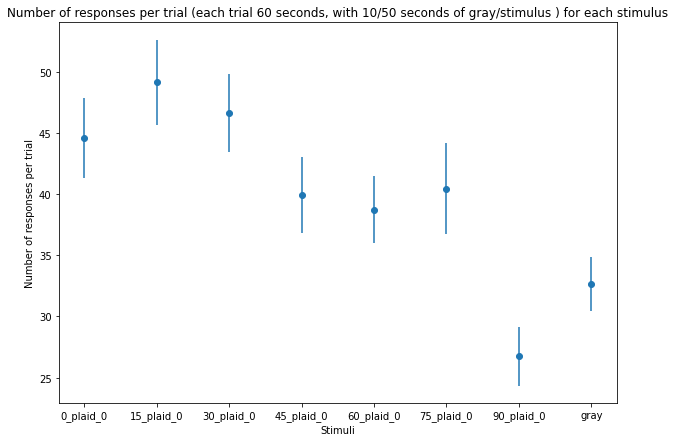

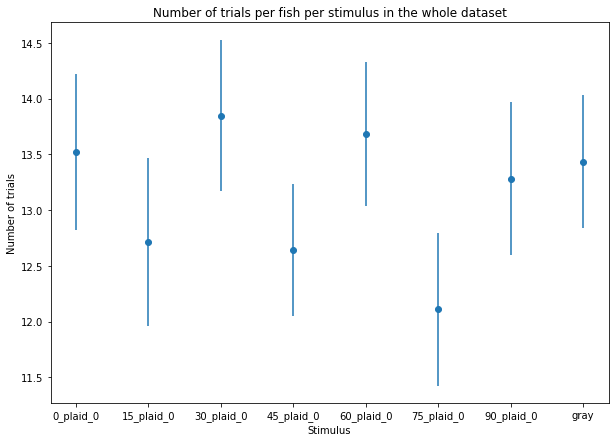

In [58]:
# make sure this is what you say it is and then see if you can statistics.
plt.rcParams["figure.figsize"] = (10, 7)
def response_frequcency():
    # response frequency in terms of number of trials responded, or bouts/time spent in the setup
    # you do a groupby and take max of number of trials for each fish
    # then you count the responses/ or you just count the responses per stimulus per fish...just like for preference index and get the average and the sem.
    # then x axis is the stimuli and y axis is the value of number of responses per stimulus per fish per number of trials it was exposed to...
    sums_df = df.groupby(['fish_ID', 'stimulus_name']).sum()  # her for each fish i look at each stimulus and count the responses
    # you could also do this per trial, if that makes you feel better...
    max_df = df.groupby(['fish_ID', 'stimulus_name']).max()  # here lie trial maximum values'
    mean_max_df = max_df.groupby(['stimulus_name']).mean() # how do you count trials???
    sem_max_df = max_df.groupby(['stimulus_name']).std()/ (len(df['fish_ID'].unique())) ** 0.5
    # so the responses of sums df could be divided by the trial of max_df before we merge everything? lets see
    sums_df[variable] = sums_df[variable]/max_df['trial'] # how many responses divided by how many trials there were for that condition.
    mean_df = sums_df.groupby(['stimulus_name']).mean()
    sem_df = sums_df.groupby(['stimulus_name']).std() / (len(df['fish_ID'].unique())) ** 0.5
    stimuli = mean_df.index.unique('stimulus_name')

    x = np.array(stimuli.tolist())
    y = np.array(mean_df[variable])  # Effectively y = x**2
    e = np.array(sem_df[variable])

    plt.errorbar(x, y, e, linestyle='None', marker='o')
    #plt.xlabel(stimuli.tolist())
    plt.title('Number of responses per trial (each trial 60 seconds, with 10/50 seconds of gray/stimulus ) for each stimulus')
    plt.xlabel('Stimuli', size = 10)
    plt.ylabel('Number of responses per trial',size = 10)
    plt.show()

    max_df = df.groupby(['fish_ID', 'stimulus_name']).max()
    x = np.array([0,1,2,3,4,5,6,7])
    my_xticks = stimuli.tolist()
    plt.xticks(x, my_xticks)
    y = np.array(mean_max_df['trial'])  # Effectively y = x**2
    e = np.array(sem_max_df['trial'])

    plt.errorbar(x, y, e, linestyle='None', marker='o')
    #plt.scatter(x, y, linestyle='None', marker='o') # maybe better if ytou have nr of trtials per fish per stimulus then an error bar????
    plt.title('Number of trials per fish per stimulus in the whole dataset')
    plt.xlabel('Stimulus')
    plt.ylabel("Number of trials")
    plt.show()
# find a way to add pictures:: would be great
response_frequcency()
# tyhen print out in a white sheet o' paper how many fish blabla.. or somewhere in the graph, like idk...

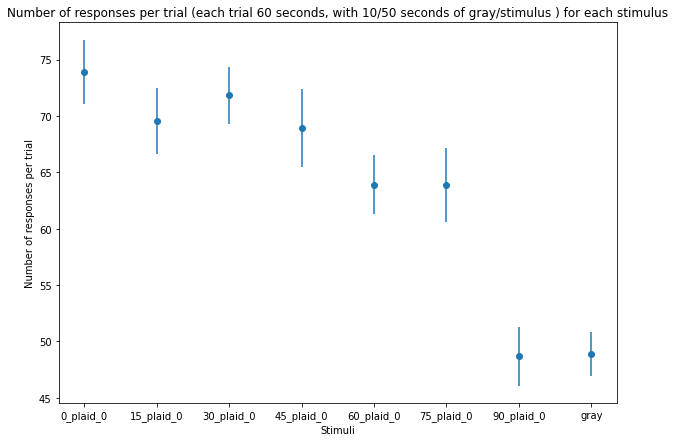

In [83]:
# Now similar function for response intensity orientation change, bout length and so on. it can be generalized and you put a list of parameters you want, maybe including response? so that you just get all the graphs at once!
# basically generalize!

# number of responses are counted per (per fish, per stimulus divided by max number of trials) trial
# you subset each fish and each stimulus, then get the mean for fish and divide it by number of trials!
# TODO - a better way to count trials!!! do it now b****
#
plt.rcParams["figure.figsize"] = (10, 7)
def response_frequcency(variable):
    sums_df = df.groupby(['fish_ID', 'stimulus_name']).sum()  # here for each fish i look at each stimulus and sum the responses
    unique_df = df.groupby(['fish_ID', 'stimulus_name']).nunique()  # here lie number of trials
    sums_df['per_trial'] = sums_df[variable]/unique_df['trial'] # divide sum of responses by number of trials, so you have a per trial average for each fish!.
    # we merge fish:
    per_stimulus_mean = sums_df.groupby(['stimulus_name']).mean() # mean of all fish, for each stimulus
    per_stimulus_sem  = sums_df.groupby(['stimulus_name']).std()/ (len(df['fish_ID'].unique())) ** 0.5 # sem of all fish for each stimulus
    stimuli = per_stimulus_mean.index.unique('stimulus_name')

    x = np.array(stimuli.tolist())
    y = np.array(per_stimulus_mean['per_trial'])  # Effectively y = x**2
    e = np.array(per_stimulus_sem['per_trial'])

    plt.errorbar(x, y, e, linestyle='None', marker='o')
    plt.title('Number of responses per trial (each trial 60 seconds, with 10/50 seconds of gray/stimulus ) for each stimulus')
    plt.xlabel('Stimuli', size = 10)
    plt.ylabel('Number of responses per trial',size = 10)
    plt.show()

# find a way to add pictures:: would be great
response_frequcency(variable = 'response')

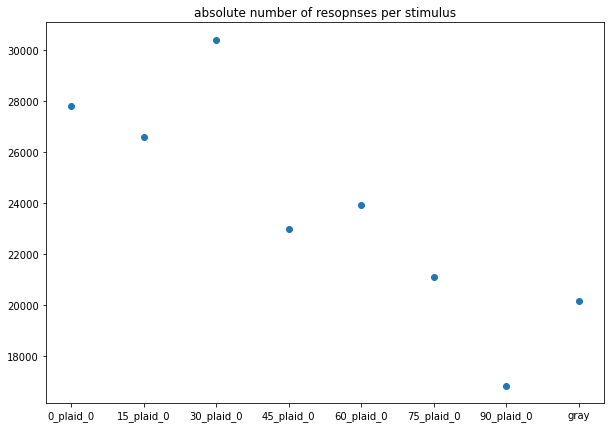

In [97]:
# absolute number of resopnses per stimulus:
sums_df = df.groupby(['stimulus_name']).sum()
stimuli = sums_df.index.unique().tolist()
x = np.array([0,1,2,3,4,5,6,7])
my_xticks = stimuli
plt.xticks(x, my_xticks)
y = sums_df['response']
plt.scatter(x,y)
plt.title("absolute number of resopnses per stimulus")
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (10, 7)
def response_frequcency(variable): # counting responses? average and sem of interbout interval
    sums_df = df.groupby(['fish_ID', 'stimulus_name']).sum()  # here for each fish i look at each stimulus and sum the responses
    unique_df = df.groupby(['fish_ID', 'stimulus_name']).nunique()  # here lie number of trials
    sums_df['per_trial'] = sums_df[variable]/unique_df['trial'] # divide sum of responses by number of trials, so you have a per trial average for each fish!.
    # we merge fish:
    per_stimulus_mean = sums_df.groupby(['stimulus_name']).mean() # mean of all fish, for each stimulus
    per_stimulus_sem  = sums_df.groupby(['stimulus_name']).std()/ (len(df['fish_ID'].unique())) ** 0.5 # sem of all fish for each stimulus
    stimuli = per_stimulus_mean.index.unique('stimulus_name')

    x = np.array(stimuli.tolist())
    y = np.array(per_stimulus_mean['per_trial'])  # Effectively y = x**2
    e = np.array(per_stimulus_sem['per_trial'])

    plt.errorbar(x, y, e, linestyle='None', marker='o')
    plt.title('Number of responses per trial (each trial 60 seconds, with 10/50 seconds of gray/stimulus ) for each stimulus')
    plt.xlabel('Stimuli', size = 10)
    plt.ylabel('Number of responses per trial',size = 10)
    plt.show()
# find a way to add pictures:: would be great
response_frequcency(variable = 'response')

Text(0.5, 1.0, 'absolute number of trials per stimulus, which passed the sanity check')

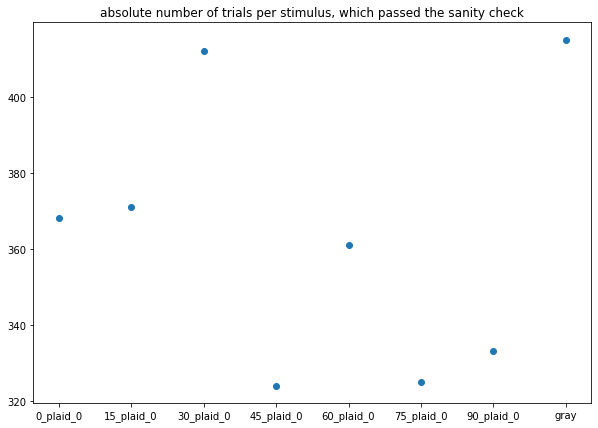

In [114]:
# absolute number of trials per stimulus:
sums_df = df.groupby(['fish_ID','stimulus_name']).nunique()
sums_df = sums_df.groupby(['stimulus_name']).sum()
stimuli = sums_df.index.unique().tolist()
x = np.array([0,1,2,3,4,5,6,7])
my_xticks = stimuli
plt.xticks(x, my_xticks)
y = sums_df['trial']
plt.scatter(x,y)
plt.title('absolute number of trials per stimulus, which passed the sanity check') # so in the combined data you also extract the absolute number of trials
# and see the fraction of trials that did not pass sanity check for each stimulus!

In [111]:
df_combined_data.reset_index(inplace=True)

Text(0.5, 1.0, 'absolute number of trials per stimulus,from combined data')

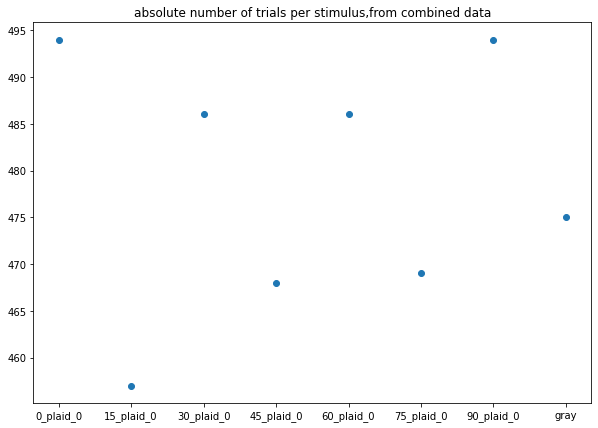

In [113]:
# absolute number of trials per stimulus:
sums_df_combined = df_combined_data.groupby(['fish_ID','stimulus_name']).nunique()
sums_df_combined = sums_df_combined.groupby(['stimulus_name']).sum()
stimuli = sums_df_combined.index.unique().tolist()
x = np.array([0,1,2,3,4,5,6,7])
my_xticks = stimuli
plt.xticks(x, my_xticks)
y = sums_df_combined['trial']
plt.scatter(x,y)
plt.title('absolute number of trials per stimulus,from combined data') # so in the combined data you also extract the absolute number of trials
# and see the fraction of trials that did not pass sanity check for each stimulus!

Text(0.5, 1.0, 'absolute number of trials per stimulus, which passed the sanity check')

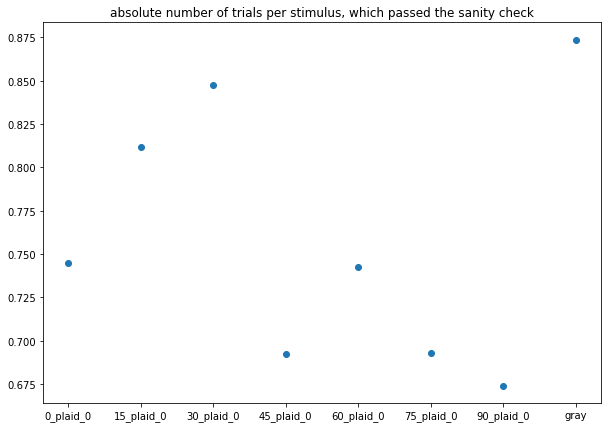

In [115]:
x = np.array([0,1,2,3,4,5,6,7])
my_xticks = stimuli
plt.xticks(x, my_xticks)
y = sums_df['trial']/sums_df_combined['trial']
plt.scatter(x,y)
plt.title('absolute number of trials per stimulus, which passed the sanity check') # so in the combined data you also extract the absolute number of trials
# and see the fraction of trials that did not pass sanity check for each stimulus! # per fish and sem for this!!

In [ ]:
    x = np.array([0,1,2,3,4,5,6,7])
    my_xticks = stimuli.tolist()
    plt.xticks(x, my_xticks)
    y = np.array(mean_max_df['trial'])  # Effectively y = x**2
    e = np.array(sem_max_df['trial'])

    plt.errorbar(x, y, e, linestyle='None', marker='o')
    plt.title('Number of trials per fish per stimulus in the whole dataset')
    plt.xlabel('Stimulus')
    plt.ylabel("Number of trials")
    plt.show()

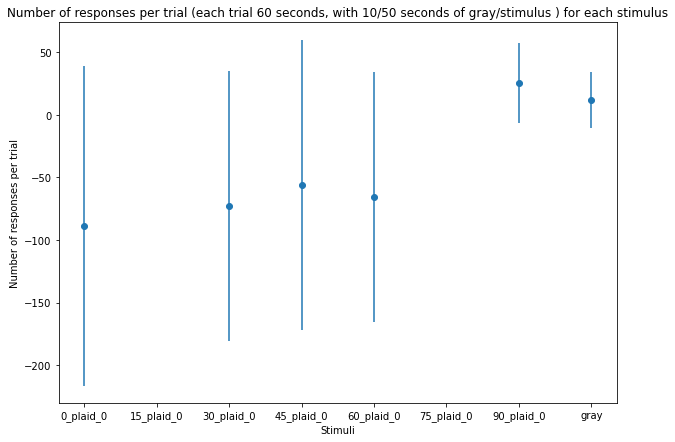

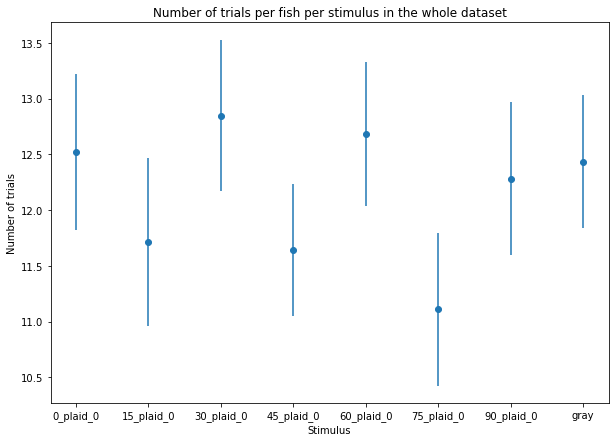

In [78]:
response_frequcency(variable = 'estimated_orientation_change')

In [14]:
df['fish_ID'].unique().tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [15]:
df_index['stimulus_name'].unique().tolist()

['0_plaid_0', '0_plaid_-45', '45_plaid_0', '0_plaid_45']

In [16]:
len(df)

204213

In [17]:
df1 = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_preprocessed.hdf5")
df2 = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\plaids\data_preprocessed.hdf5")

#frames = [df1, df2]
#result = pd.concat(frames)
#result.to_hdf(r"C:\Users\ag-bahl\Desktop\plaids\data_preprocessed_concat.hdf5", key="all_events", complevel=9)

KeyboardInterrupt: 

In [13]:
# from result we exclude all bouts with abs value smaller than
frames = [df1, df2]
result = pd.concat(frames)

In [19]:
ls = df['stimulus_name'].unique().tolist()

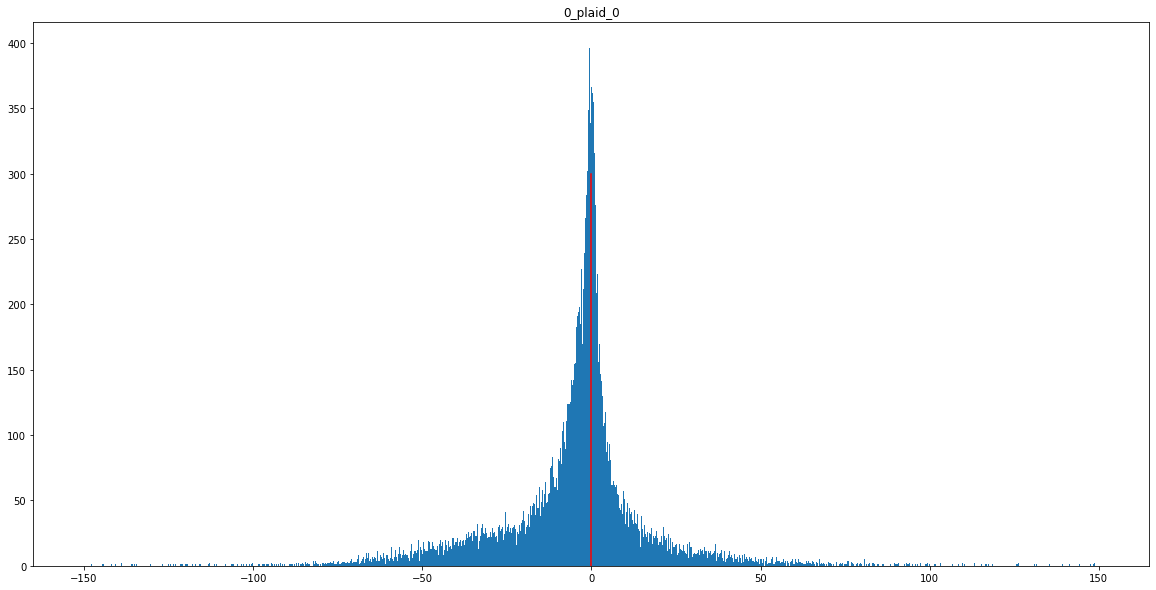

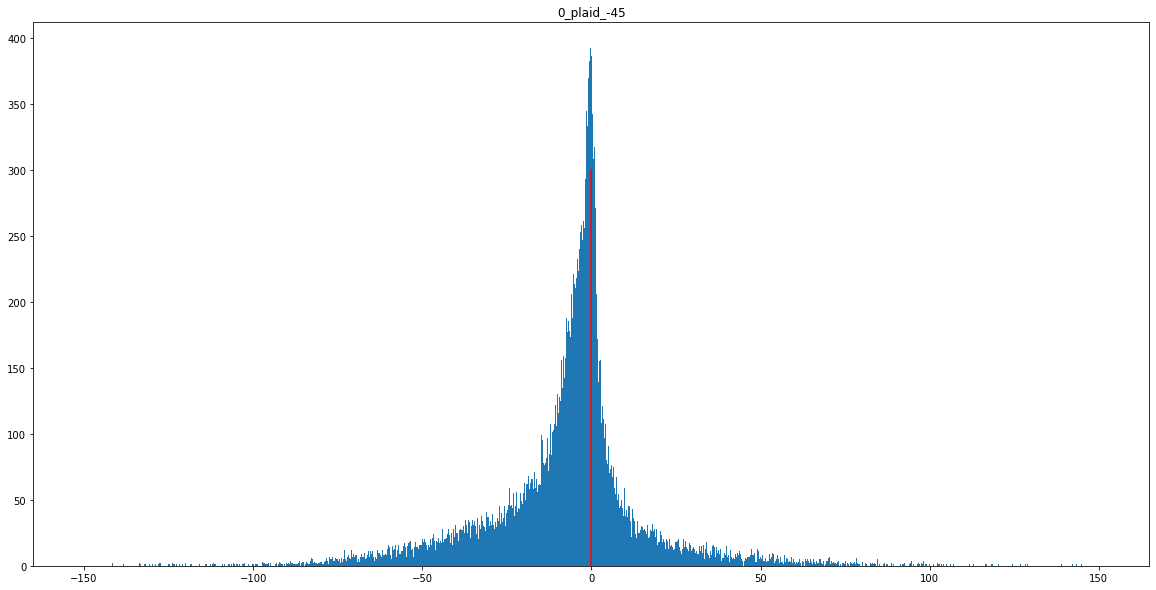

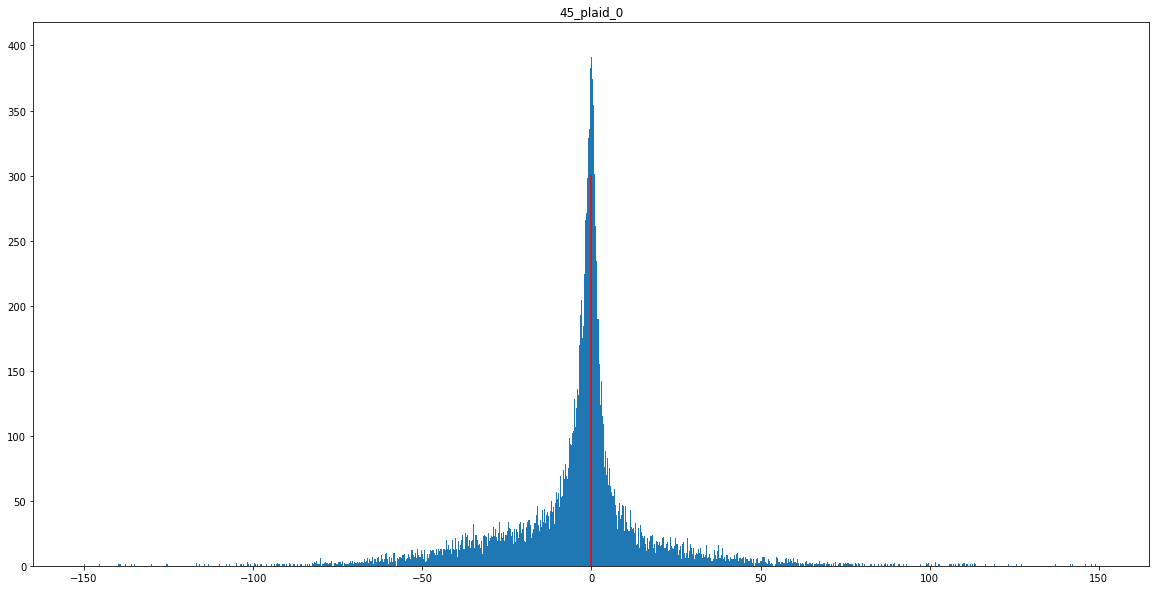

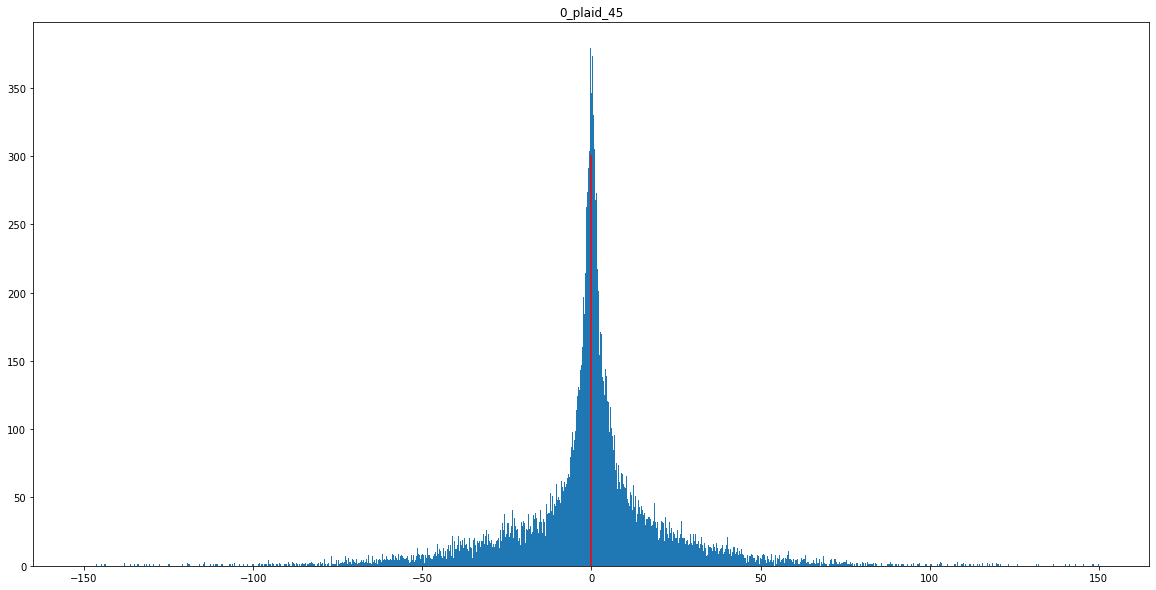

In [22]:
plt.rcParams["figure.figsize"] = (20, 10)

for stim in ls:
    sub = df[df['stimulus_name']== stim]
    plt.hist(sub['estimated_orientation_change'],bins = np.arange(-150,150,0.1))
    plt.plot([0,0],[0,300],color = 'red')
    plt.title(stim)
    plt.show()